In [1]:
# https://thebook.io/080228/part05/ch16/03/

# https://thebook.io/080228/part05/ch16/06-01/

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, \
                                Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [3]:
# 책에선 seed 고정하는데, 여기선 안함

# seed 값 설정
#seed = 0
#numpy.random.seed(seed)
#tf.random.set_seed(3)

In [4]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

#target 값.  어차피 원핫인코딩 값으로 만들어 줘야함
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

#여기까지가 데이터 전처리

In [5]:
# 시퀀스 객체 생성

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# 풀링의 종류 다양, 여기성 멕스 풀링 = 계산량은 줄이되, 특징은 줄이지 않음
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())  # 28by 28by 1 3차원인데 -> 1차원으로 쫙 펴주겠다는 것
model.add(Dense(128, activation='relu'))  # 출력은 128, activation은 relu
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
# 모델 폴더안을 비워둬야함
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])  #early_stopping_callback 때문에 19에서 멈춤


Epoch 00001: val_loss improved from inf to 0.05764, saving model to ./model\01-0.0576.hdf5

Epoch 00002: val_loss improved from 0.05764 to 0.04271, saving model to ./model\02-0.0427.hdf5

Epoch 00003: val_loss improved from 0.04271 to 0.03400, saving model to ./model\03-0.0340.hdf5

Epoch 00004: val_loss improved from 0.03400 to 0.03115, saving model to ./model\04-0.0311.hdf5

Epoch 00005: val_loss improved from 0.03115 to 0.02958, saving model to ./model\05-0.0296.hdf5

Epoch 00006: val_loss did not improve from 0.02958

Epoch 00007: val_loss improved from 0.02958 to 0.02637, saving model to ./model\07-0.0264.hdf5

Epoch 00008: val_loss did not improve from 0.02637

Epoch 00009: val_loss improved from 0.02637 to 0.02444, saving model to ./model\09-0.0244.hdf5

Epoch 00010: val_loss did not improve from 0.02444

Epoch 00011: val_loss did not improve from 0.02444

Epoch 00012: val_loss did not improve from 0.02444

Epoch 00013: val_loss did not improve from 0.02444

Epoch 00014: val_lo

In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 거의 100%
# 100이 안되는 이유는, 사람도 알아보기 힘든 그림이 들어가 있어서...

313/313 [==============================] - 2s 4ms/step - loss: 0.0281 - accuracy: 0.9926

 Test Accuracy: 0.9926


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

In [13]:
# 학습셋의 오차
y_loss = history.history['loss']

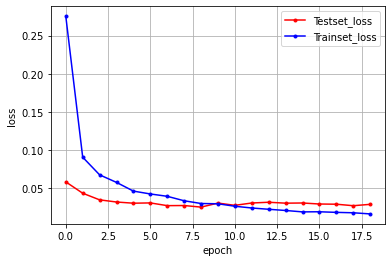

In [14]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
# https://thebook.io/080228/part05/ch16/05/